<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Workshop_3/blob/main/Simple_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please 'run all' (Ctrl + F9).
-------------------------------------------

---



## Import Necessary Libraries

In [9]:
# @title
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Upload the Source CSV File

In [10]:
# @title
uploaded = files.upload()

# Load the CSV into a DataFrame (ignoring headings)
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name, header=None)

# Ignore the first row (if it contains column names)
# and convert data to numeric type
data = data.apply(pd.to_numeric, errors='coerce')

# Drop any rows or columns with NaN values (optional)
data = data.dropna()

Saving california_housing_train.csv to california_housing_train (1).csv


## Principal Component Analysis (PCA)

The parameter n_components in PCA specifies the number of principal components to keep in the output, effectively controlling the dimensionality of the transformed data.

In [11]:
"""
while True:
    try:
        n_components = int(input(f"Enter the number of components for PCA (1 to {min(data.shape[0], data.shape[1])}): "))
        if 1 <= n_components <= min(data.shape[0], data.shape[1]):
            break
        else:
            print("Please enter a valid number within the range.")
    except ValueError:
        print("Invalid input. Please enter an integer.")
"""

n_components = 1 #@param{type:'slider', min:1, max:3, step:1}

# Initialise PCA with the desired number of components (e.g., 2 for 2D visualisation)
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance):.2f}")


Explained variance by each component: [0.99953101]
Total explained variance: 1.00


## Visualise the results & Save Result (.csv) in Google Drive




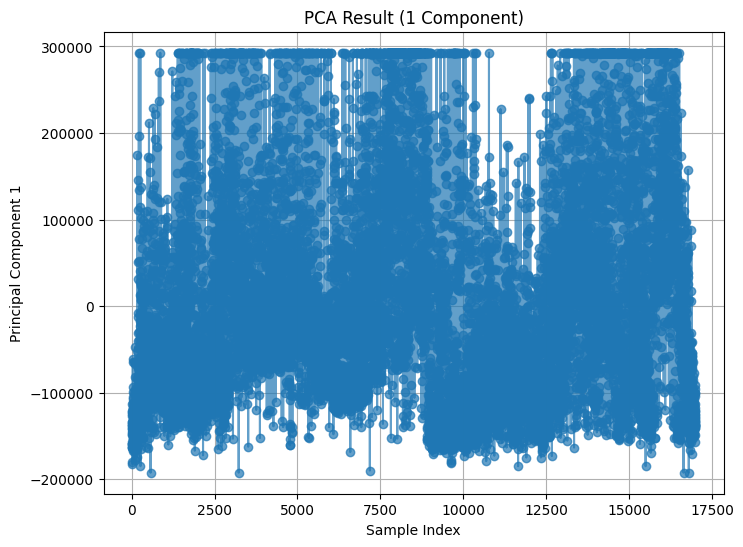

PCA results saved to /content/drive/My Drive/pca_result.csv


In [12]:
if n_components == 1:
    # Convert PCA result to DataFrame
    pca_df = pd.DataFrame(pca_result, columns=['PC1'])

    # Plot the single principal component
    plt.figure(figsize=(8, 6))
    plt.plot(pca_df.index, pca_df['PC1'], marker='o', linestyle='-', alpha=0.7)
    plt.title('PCA Result (1 Component)')
    plt.xlabel('Sample Index')
    plt.ylabel('Principal Component 1')
    plt.grid(True)
    plt.show()

elif n_components == 2:
    # Convert PCA result to DataFrame for easier plotting
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

    # Plot the first two principal components
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
    plt.title('PCA Result (2 Components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

elif n_components == 3:
    from mpl_toolkits.mplot3d import Axes3D
    # Convert PCA result to DataFrame for easier plotting
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

    # Plot the first three principal components
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.7)
    ax.set_title('PCA Result (3 Components)')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.show()

else:
    print(f"PCA completed with {n_components} components. No visualization available.")

# Optional: Save the PCA results to Google Drive
columns = [f"PC{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(pca_result, columns=columns)

# Save the PCA results to the user's Google Drive
output_path = '/content/drive/My Drive/pca_result.csv' #@param{type:'string'}
pca_df.to_csv(output_path, index=False)
print(f"PCA results saved to {output_path}")
